<a href="https://colab.research.google.com/github/Hrotich/WEEK8-IP/blob/main/Copy_of_week_9_IP_%2C_HARON_KIPKOECH_ROTICH%2C_NAIVE_BAYES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Defining the Question

### a) Specifying the Data Analytic Question

using Bayes Naives classifier , build a model that  classify  a text as spam or non spam  whicle selecting the  best  algorythm to apply 

### b) Defining the Metric for Success

 the metric to measuresuccess is toget a an algprythm classsifier that best fit the problem and best test size  that gives higher accuracy of  between 60% -90%

## c) Understanding the context 

the dataet is about sms messages that are sent to email where a text can either be a spam or not spam, and there only two outcomes thus making the data set to be binary


## 2. Reading the Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
spam=pd.read_csv("https://raw.githubusercontent.com/Hrotich/HRK/main/spambase.data")
spam

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


### Exploring data

In [7]:
# to check on data entries
spam.shape
# our data hat 4600 rows and columns

(4600, 58)

In [8]:
# check on data describtion
spam.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,0.059837,0.541680,0.093950,0.058639,0.049215,0.248833,0.142617,0.184504,1.662041,0.085596,0.809728,0.121228,0.101667,0.094289,0.549624,0.265441,0.767472,0.124872,0.098937,0.102874,0.064767,0.047059,0.097250,0.047846,0.105435,0.097498,0.136983,0.013204,0.078646,0.064848,0.043676,0.132367,0.046109,0.079213,0.301289,0.179863,0.005446,0.031876,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,0.201565,0.861791,0.301065,0.335219,0.258871,0.825881,0.444099,0.530930,1.775669,0.509821,1.200938,1.025866,0.350321,0.442681,1.671511,0.887043,3.367639,0.538631,0.593389,0.456729,0.403435,0.328594,0.555966,0.329480,0.532315,0.402664,0.423493,0.220675,0.434718,0.349953,0.361243,0.766900,0.223835,0.622042,1.011787,0.911214,0.076283,0.285765,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.800000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,2.640000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

##DATA CLEANING

In [9]:
# to check for missing values
spam.isnull().sum()
# no null values weer present

0         0
0.64      0
0.64.1    0
0.1       0
0.32      0
0.2       0
0.3       0
0.4       0
0.5       0
0.6       0
0.7       0
0.64.2    0
0.8       0
0.9       0
0.10      0
0.32.1    0
0.11      0
1.29      0
1.93      0
0.12      0
0.96      0
0.13      0
0.14      0
0.15      0
0.16      0
0.17      0
0.18      0
0.19      0
0.20      0
0.21      0
0.22      0
0.23      0
0.24      0
0.25      0
0.26      0
0.27      0
0.28      0
0.29      0
0.30      0
0.31      0
0.32.2    0
0.33      0
0.34      0
0.35      0
0.36      0
0.37      0
0.38      0
0.39      0
0.40      0
0.41      0
0.42      0
0.778     0
0.43      0
0.44      0
3.756     0
61        0
278       0
1         0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


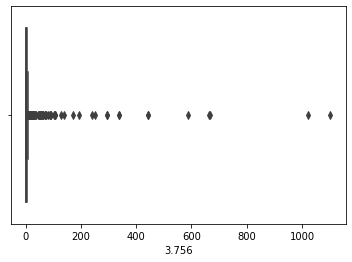

In [10]:
# outliers
sns.boxplot(spam['3.756'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


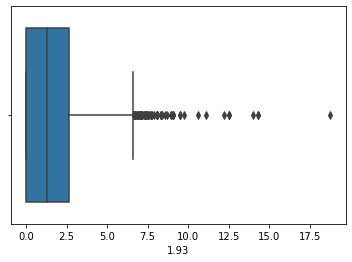

In [11]:
sns.boxplot(spam['1.93'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


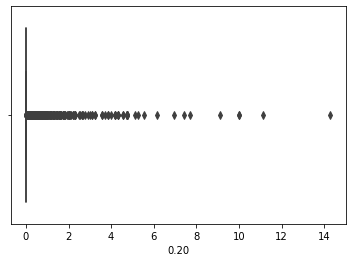

In [12]:
sns.boxplot(spam['0.20'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


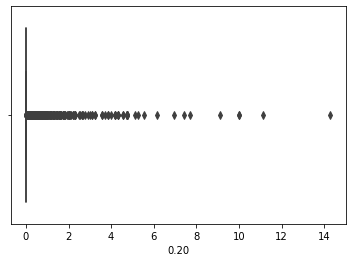

In [13]:
sns.boxplot(spam['0.20'])

In [14]:
# checking for outliers
Q1=spam.quantile(0.25)
Q3=spam.quantile(0.75)
IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
print(lowqe_bound,upper_bound)
# there were a number of outliers in our dataset and getting rid of them could likely to distort  the significance of data


0           0.000000
0.64        0.000000
0.64.1     -0.630000
0.1         0.000000
0.32       -0.573750
0.2         0.000000
0.3         0.000000
0.4         0.000000
0.5         0.000000
0.6        -0.240000
0.7         0.000000
0.64.2     -1.200000
0.8         0.000000
0.9         0.000000
0.10        0.000000
0.32.1     -0.150000
0.11        0.000000
1.29        0.000000
1.93       -3.960000
0.12        0.000000
0.96       -1.905000
0.13        0.000000
0.14        0.000000
0.15        0.000000
0.16        0.000000
0.17        0.000000
0.18        0.000000
0.19        0.000000
0.20        0.000000
0.21        0.000000
0.22        0.000000
0.23        0.000000
0.24        0.000000
0.25        0.000000
0.26        0.000000
0.27        0.000000
0.28        0.000000
0.29        0.000000
0.30        0.000000
0.31        0.000000
0.32.2      0.000000
0.33        0.000000
0.34        0.000000
0.35        0.000000
0.36       -0.165000
0.37        0.000000
0.38        0.000000
0.39        0

In [15]:
# to repalce the last column name 
spam.rename(columns = {'1':'target'}, inplace = True)


BIVARIATE ANALYSIS

(array([4.344e+03, 1.340e+02, 4.800e+01, 2.900e+01, 8.000e+00, 1.000e+01,
        9.000e+00, 1.100e+01, 6.000e+00, 1.000e+00]),
 array([0.   , 0.588, 1.176, 1.764, 2.352, 2.94 , 3.528, 4.116, 4.704,
        5.292, 5.88 ]),
 <a list of 10 Patch objects>)

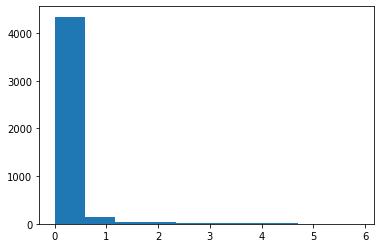

In [16]:
# histogram plot 
plt.hist(spam['0.21'])

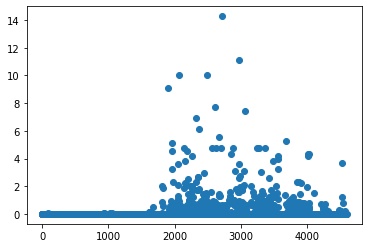

In [17]:
# scatter plot for col "0.20" destribution
plt.scatter(spam.index,spam['0.20'])
plt.show()

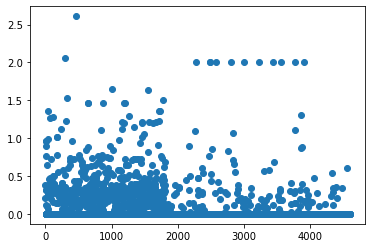

In [18]:
plt.scatter(spam.index,spam['0.7'])
plt.show()

(array([4.267e+03, 2.370e+02, 6.500e+01, 1.700e+01, 6.000e+00, 5.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([0.   , 0.909, 1.818, 2.727, 3.636, 4.545, 5.454, 6.363, 7.272,
        8.181, 9.09 ]),
 <a list of 10 Patch objects>)

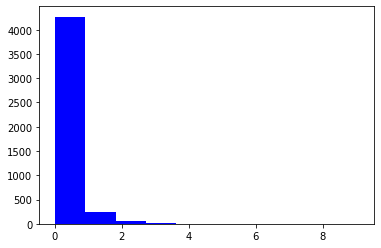

In [19]:

plt.hist(spam['1.29'],color='blue',bins= 10)

(array([4.542e+03, 2.700e+01, 1.100e+01, 4.000e+00, 1.600e+01]),
 array([0.   , 0.952, 1.904, 2.856, 3.808, 4.76 ]),
 <a list of 5 Patch objects>)

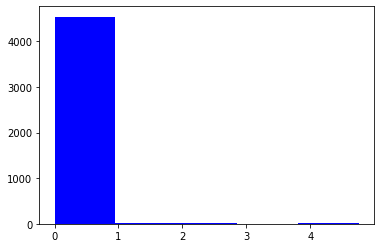

In [20]:

plt.hist(spam['0.25'],color='blue',bins= 5)

# BIVARIATE SUMMARIES

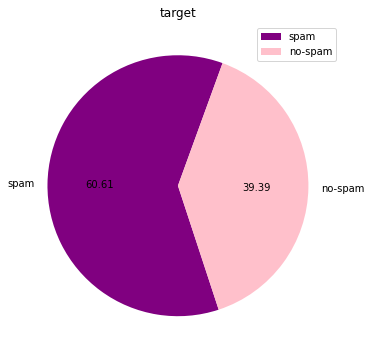

In [21]:
plt.figure(figsize=(10,6))
plt.title('target')
plt.pie(x=spam.target.value_counts(),
        labels=['spam','no-spam'],
        startangle = 70,
        colors=['purple','pink'],
        autopct='%.2f'
       );
plt.legend();

In [22]:
# heatmap
spam.columns

Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', 'target'],
      dtype='object')

In [23]:
corr =spam[['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', 'target']].corr()
corr

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,target
0,1.000000,-0.016735,0.065684,0.013270,0.023120,0.059650,0.007647,-0.003970,0.106241,0.041171,0.188441,0.105811,0.066416,0.036768,0.028425,0.059393,0.081906,0.053504,0.128256,0.021282,0.197061,-0.024358,0.134053,0.188143,-0.072530,-0.061710,-0.066443,-0.048698,-0.041264,-0.052817,-0.039079,-0.032069,-0.041028,-0.027701,-0.044969,-0.054692,-0.057338,-0.007965,-0.011148,-0.036110,-0.009712,-0.026083,-0.024308,-0.022126,-0.037128,-0.034071,-0.000958,-0.017763,-0.026517,-0.021235,-0.033313,0.058342,0.117398,-0.008852,0.044488,0.061387,0.089165,0.126323
0.64,-0.016735,1.000000,-0.033579,-0.006920,-0.023761,-0.024815,0.003939,-0.016261,-0.003803,0.032989,-0.006843,-0.040406,-0.018836,-0.009194,0.005344,-0.009123,-0.018348,0.033366,-0.055488,-0.015794,-0.018200,-0.008841,-0.020481,0.001999,-0.043461,-0.038191,-0.030291,-0.029205,-0.021928,-0.027492,-0.018086,-0.003316,-0.024891,-0.004292,-0.024044,-0.028181,-0.023990,-0.008918,-0.019111,-0.014808,-0.015411,-0.025165,-0.002355,-0.019730,-0.016397,-0.023844,-0.009813,-0.015739,-0.007270,-0.049802,-0.018516,-0.014506,-0.009584,0.001953,0.002086,0.000268,-0.022679,-0.030318
0.64.1,0.065684,-0.033579,1.000000,-0.020240,0.077737,0.087624,0.036725,0.012044,0.093843,0.032135,0.048304,0.083197,0.047644,0.008580,0.122150,0.063896,0.036314,0.121665,0.139314,0.031139,0.156641,-0.035665,0.123724,0.041181,-0.087879,-0.062417,-0.108857,-0.050615,-0.057703,-0.032514,-0.038905,-0.061852,-0.054735,-0.061687,-0.048307,-0.046469,-0.066970,0.032418,-0.014782,-0.047040,-0.030939,-0.005784,-0.044296,-0.053448,-0.050621,-0.056628,0.029351,-0.026328,-0.033190,-0.016417,-0.033098,0.108054,0.087671,-0.003320,0.097410,0.107462,0.070119,0.196840
0.1,0.013270,-0.006920,-0.020240,1.000000,0.003238,-0.010018,0.019781,0.010265,-0.002458,-0.004951,-0.012980,-0.019220,-0.013203,0.012006,0.002705,0.007433,0.003467,0.019422,-0.010832,-0.005383,0.008177,0.028101,0.011365,0.035358,-0.015185,-0.013711,-0.010687,-0.010370,-0.007799,-0.010478,-0.007531,-0.006718,-0.008077,-0.006730,-0.006124,-0.006517,-0.007765,-0.002669,-0.004604,-0.007645,-0.005672,-0.008097,-0.009270,-0.005935,-0.012960,-0.009183,-0.003349,-0.001925,-0.000592,-0.012376,-0.007150,-0.003132,0.010859,-0.000299,0.005260,0.022081,0.021369,0.057394
0.32,0.023120,-0.023761,0.077737,0.003238,1.000000,0.054055,0.147338,0.029599,0.020824,0.034497,0.068383,0.066788,0.031127,0.003446,0.056177,0.083024,0.143446,0.062368,0.098510,0.031527,0.136605,-0.020207,0.070039,0.000040,-0.072502,-0.075456,-0.088011,-0.061500,0.032048,-0.052066,-0.042535,-0.026748,-0.031997,-0.026960,-0.049731,-0.048844,-0.072599,0.130812,-0.042044,-0.021442,-0.047505,0.115042,-0.048878,0.015234,-0.042336,-0.077985,-0.026900,-0.032005,-0.032759,-0.046361,-0.026389,0.025509,0.041583,0.002016,0.052662,0.052290,0.002492,0.241958
0.2,0.059650,-0.024815,0.087624,-0.010018,0.054055,1.000000,0.061142,0.079543,0.117416,0.013869,0.053878,0.009272,0.077609,0.009660,0.173055,0.019872,0.064114,0.078547,0.095518,0.058967,0.106844,0.007948,0.211437,0.059314,-0.084430,-0.087296,-0.069070,-0.066242,-0.048686,-0.048145,-0.046396,-0.036847,-0.034178,-0.037327,-0.054331,-0.052838,-0.057491,-0.017923,-0.047633,-0.029880,-0.029466,-0.054826,-0.030632,-0.028837,-0.053661,-0.033061,-0.014349,-0.031702,-0.019131,-0.008745,-0.015145,0.065094,0.105671,0.019887,-0.010282,0.090177,0.082089,0.232741
0.3,0.007647,0.003939,0.036725,0.019781,0.147338,0.061142,1.000000,0.044530,0.050767,0.056787,0.159562,-0.001454,0.013276,-0.022734,0.042892,0.128442,0.187965,0.122202,0.111803,0.046124,0.130804,-0.002101,0.064778,0.030562,-0.089517,-0.080350,-0.065908,-0.066962,-0.048493,-0.058116,-0.046290,-0.040548,-0.041384,-0.040920,-0.053215,-0.053995,-0.0520

 there is correlation between our target variables and other independent variables

NAIVE BAYES 

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer


In [49]:
spam.columns

Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', 'target'],
      dtype='object')

In [68]:
# separating data to targt and feature set
X = spam[['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278']]
y = spam['target']

In [63]:
# Create normalizer
normalizer = Normalizer(norm='l2')

# Transform feature matrix
normalizer.transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but Normalizer was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([[2.03297105e-04, 2.71062806e-04, 4.84040726e-04, ...,
        4.95076854e-03, 9.77762266e-02, 9.95187732e-01],
       [2.59683978e-05, 0.00000000e+00, 3.07292708e-04, ...,
        4.25059392e-03, 2.09911216e-01, 9.77710178e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.81192865e-02, 2.04911354e-01, 9.78451717e-01],
       ...,
       [2.53812946e-03, 0.00000000e+00, 2.53812946e-03, ...,
        1.18784459e-02, 5.07625892e-02, 9.98330921e-01],
       [1.22759766e-02, 0.00000000e+00, 0.00000000e+00, ...,
        1.46672345e-02, 6.39373781e-02, 9.97423098e-01],
       [0.00000000e+00, 0.00000000e+00, 1.59858723e-02, ...,
        3.07420620e-02, 1.22968248e-01, 9.83745986e-01]])

In [65]:
#splitting data to train and test set
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50) 

In [66]:
#multinomial naive bayes
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

In [67]:
# Evaluating the Model

predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.7869565217391304


In [69]:
# adjusting  the  test size using test size of  30 -70
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50) 

In [70]:
#multinomial naive bayes model building
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

In [71]:
# Evaluating the Model

predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.7913043478260869


In [73]:
# Inccreasing further ou test size to be 40%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50) 

In [74]:
#multinomial naive bayes model building
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

In [75]:
# Evaluating the Model

predicted = model.predict(X_test)
print(np.mean(predicted == y_test))
# the accuracy drops

0.7831521739130435


multinomial Naive Bayes  algorythm is good for this data set  since the data is multinimially distributed

on increasing the  test size a slight increase is witnessed in accuracy from
 0.78 to 0.791 then on further increase the model accuracy drop back to its original figure

In [82]:
# Inccreasing further ou test size to be 40%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50) 

In [83]:
# applying gaussian bayes
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [84]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8021739130434783


In [96]:
# Inccreasing further ou test size to be 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50) 

In [97]:
# applying gaussian bayes
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [98]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8057971014492754


In [99]:
# Inccreasing further ou test size to be 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50) 

In [100]:
# applying gaussian bayes
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [101]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8114130434782608


# gaussian Bayes gives a higher accuracy of 0.80 for test size of 0.2 , with slight icrease with increase in test size to 0.3 and further increase to  0.81 for test size of 0.4, with this we can say gaussian NB is better than  multinomial, only that it assumes  gaussian distribution which  is wrong assumption

In [102]:
#bernouli naive classifier
from sklearn.naive_bayes import BernoulliNB

In [104]:
# Inccreasing further ou test size to be 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50) 

In [103]:
# Creating oour Bernoulli Naive Bayes object with prior probabilities of each class
clf = BernoulliNB()

# Train model
model = clf.fit(X, y)

# model score
model.score(X, y)

0.8860869565217391

In [108]:
# Inccreasing further ou test size to be 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50) 

In [109]:
# Creating oour Bernoulli Naive Bayes object with prior probabilities of each class
clf = BernoulliNB()

# Train model
model = clf.fit(X, y)

# model score
model.score(X, y)

0.8860869565217391

Bernouli gives the  high accuracy of 0.88 which is much higher than other models, with change in test size  the accuracy dont change at all

## Bernoulli gives  better performance than the other models  though it assumes  that the  variables are binary